In [ ]:
from TMMFix.parse_makam_xml import fix_m21_parsing_makam
import matplotlib.pyplot as plt
FILE_NAME = "hicaz--sarki--aksaksemai--sezdim_dargin--rifat_ayaydin.xml"

m21_stream_score = fix_m21_parsing_makam(FILE_NAME)

In [ ]:
for n in m21_stream_score:
    print(n.pitch.alter)
    print(n.pitch.accidental)
    print(n.pitch.microtone, "\n")

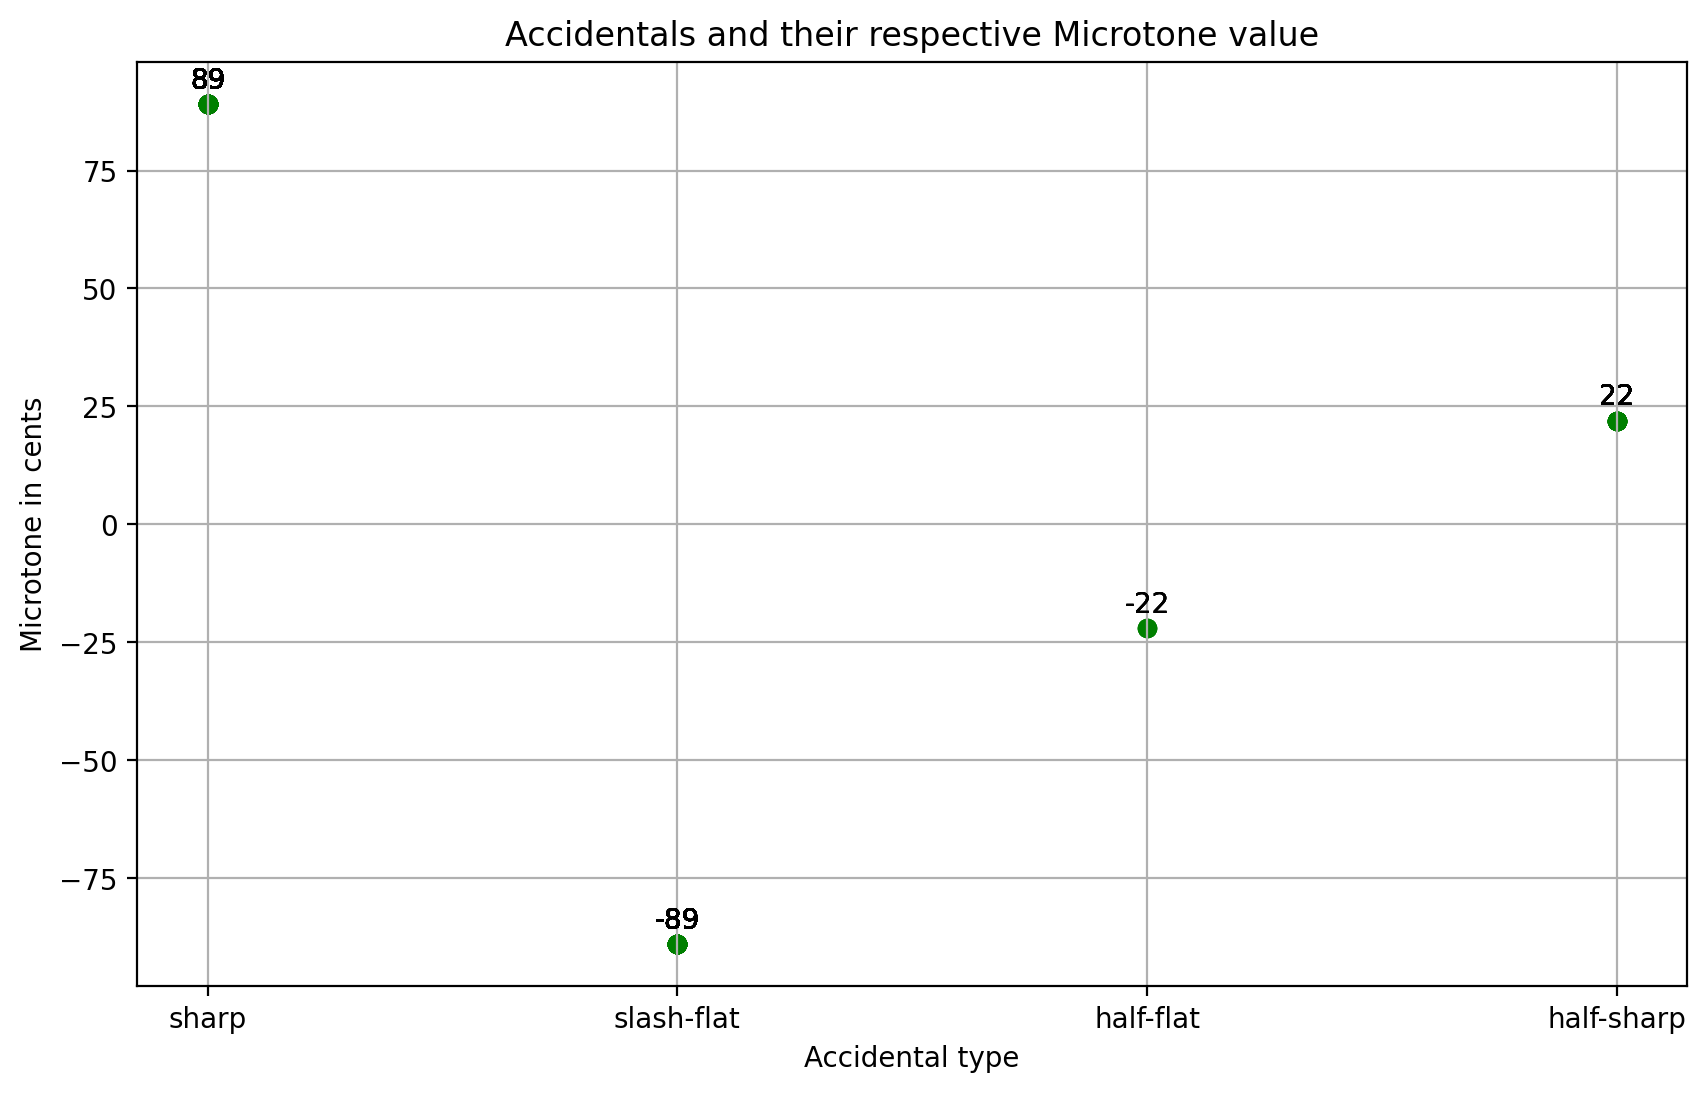

In [44]:
accidentals = []
microtones = []

for n in m21_stream_score:
    if n.pitch.accidental is not None:
        accidentals.append(n.pitch.accidental.name)
        microtones.append(n.pitch.microtone.cents)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(accidentals, microtones, marker='o', linestyle='-', color='green')

# Annotate each point with its microtone value
for x, y in zip(accidentals, microtones):
    plt.text(x, y+2, str(y), ha='center', va='bottom')


plt.title('Accidentals and their respective Microtone value')
plt.xlabel('Accidental type')
plt.ylabel('Microtone in cents')
plt.grid(True)
plt.show()

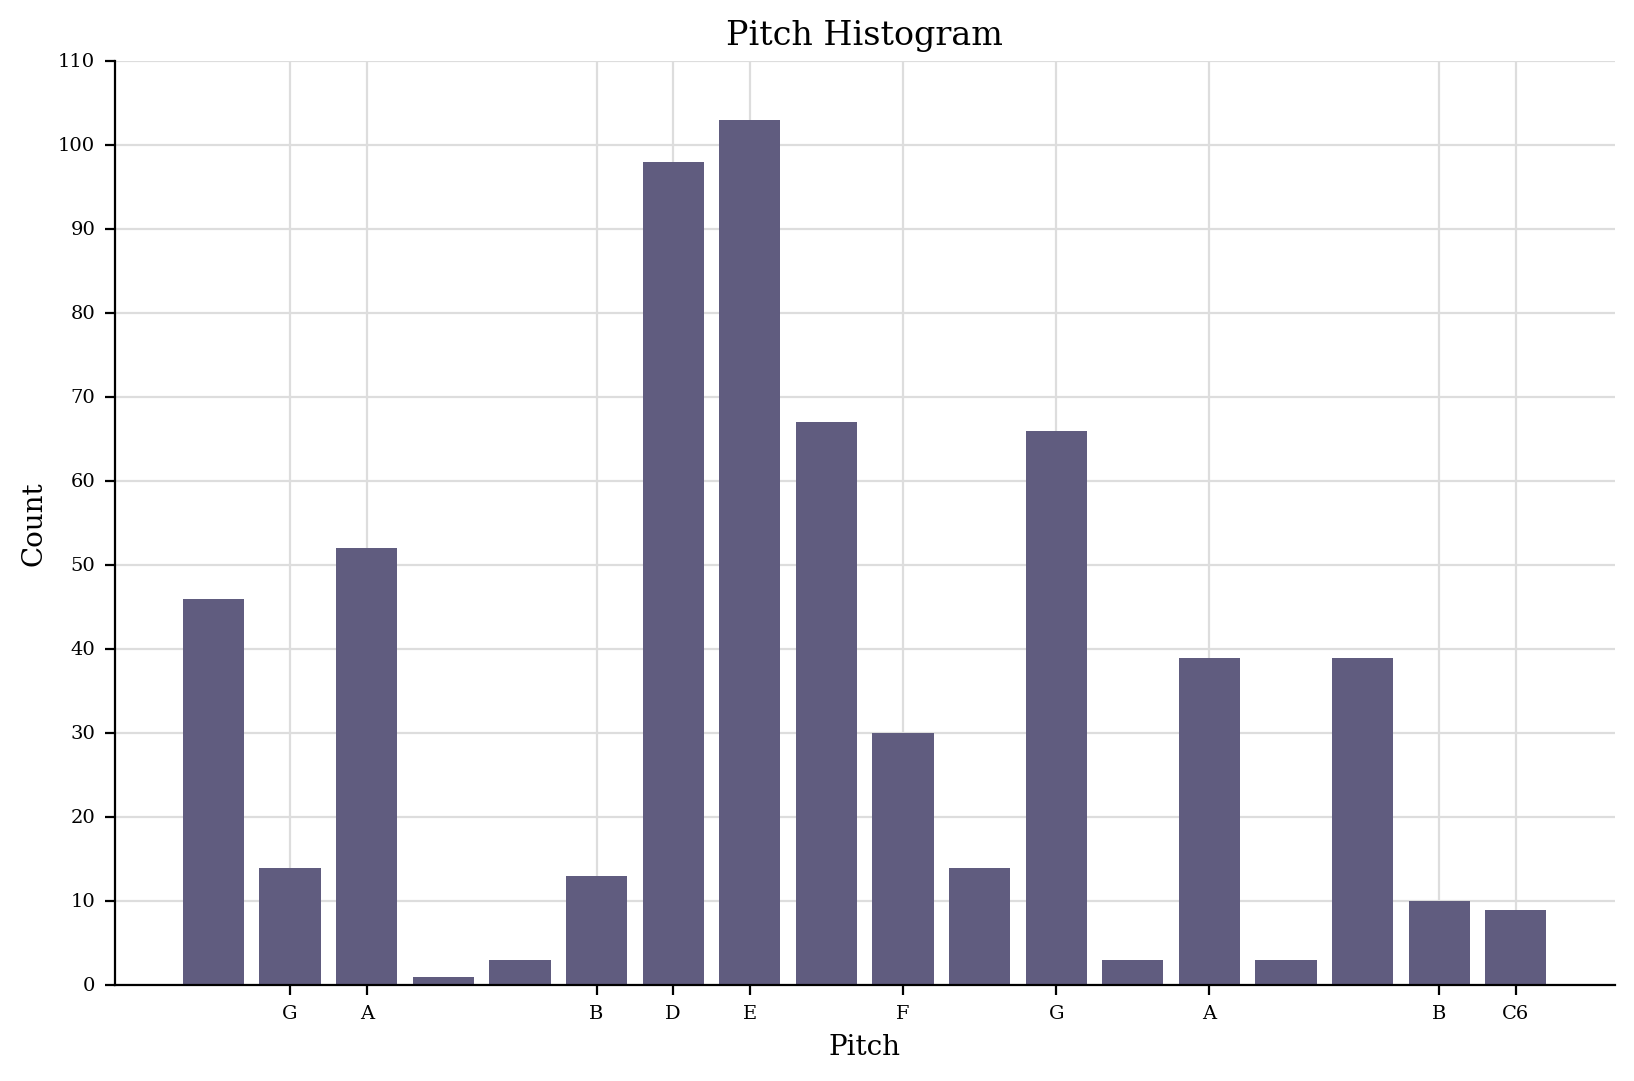

In [45]:
m21_stream_score.plot('histogram', 'pitchspace')
